___

<a href='https://sites.google.com/fat.uerj.br/livia'> <img src='../../figures/capa2.png' /></a>
___

In [1]:
path_data = '../../data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

# Usando intervalos de confiança
Um intervalo de confiança tem um único propósito – estimar um parâmetro desconhecido com base nos dados de uma amostra aleatória. Na última seção, dissemos que o intervalo (36%, 42%) era um intervalo de confiança aproximado de 95% para a porcentagem de fumantes entre as mães na população. Essa foi uma maneira formal de dizer que, de acordo com nossa estimativa, a porcentagem de fumantes entre as mães na população estava entre 36% e 42%, e que nosso processo de estimativa está correto em cerca de 95% das vezes.

É importante resistir ao impulso de usar intervalos de confiança para outros propósitos. Por exemplo, lembre-se de que calculamos o intervalo (26,9 anos, 27,6 anos) como um intervalo de confiança aproximado de 95% para a idade média das mães na população. Um mau uso assustadoramente comum do intervalo é concluir que cerca de 95% das mulheres tinham entre 26,9 e 27,6 anos. Você não precisa saber muito sobre intervalos de confiança para ver que isso não pode estar certo – você não esperaria que 95% das mães estivessem todas dentro de alguns meses de idade umas das outras. De fato, o histograma das idades amostradas mostra bastante variação.

In [3]:
births = pd.read_csv(path_data + 'baby.csv')

<Axes: xlabel='Maternal Age', ylabel='Count'>

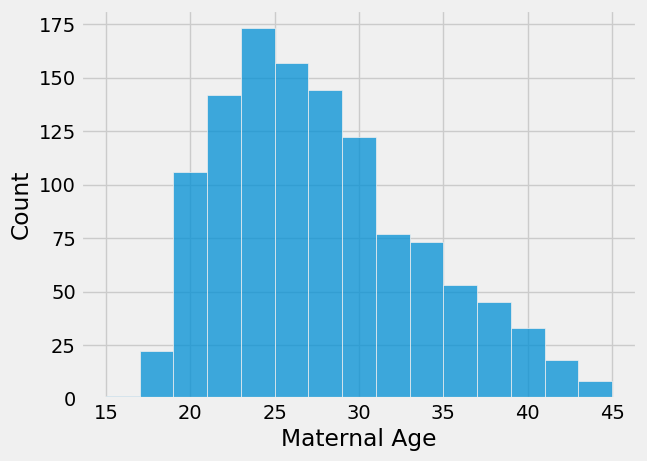

In [7]:
sns.histplot(births["Maternal Age"], bins=15)

Uma pequena porcentagem das idades amostradas está no intervalo (26,9, 27,6), e você esperaria uma pequena porcentagem semelhante na população. O intervalo estima apenas um número: a *média* de todas as idades da população.

No entanto, estimar um parâmetro por intervalos de confiança tem um uso importante além de apenas nos dizer aproximadamente o tamanho do parâmetro.

## Usando um intervalo de confiança para testar hipóteses
Nosso intervalo de confiança aproximado de 95% para a idade média da população vai de 26,9 anos para 27,6 anos. Suponha que alguém queira testar as seguintes hipóteses:

**Hipótese nula:** A idade média da população é de 30 anos.

**Hipótese alternativa:** A idade média da população não é de 30 anos.

Então, se você estivesse usando o corte de 5% para o valor-p, rejeitaria a hipótese nula. Isso ocorre porque 30 não está no intervalo de confiança de 95% para a média da população. Ao nível de significância de 5%, 30 não é um valor plausível para a média da população.

Esse uso de intervalos de confiança é o resultado de uma *dualidade* entre intervalos de confiança e testes: se você está testando se a média da população é ou não um determinado valor *x* e usa o corte de 5% para o valor-p, então você rejeitará a hipótese nula se *x* não estiver em seu intervalo de confiança de 95% para a média.

Isso pode ser estabelecido pela teoria estatística. Na prática, tudo se resume a verificar se o valor especificado na hipótese nula está ou não dentro do intervalo de confiança.

Se você estivesse usando o corte de 1% para o valor P, teria que verificar se o valor especificado na hipótese nula está em um intervalo de confiança de 99% para a média da população.

Para uma aproximação grosseira, essas afirmações também são verdadeiras para proporções populacionais, desde que a amostra seja grande.

Embora agora tenhamos uma maneira de usar intervalos de confiança para testar um determinado tipo de hipótese, você pode se perguntar sobre o valor de testar se a idade média em uma população é ou não igual a 30 anos. De fato, o valor não é claro. Mas há algumas situações em que um teste desse tipo de hipótese é natural e útil.

## Comparando pontuações iniciais e pós-tratamento

Estudaremos isso no contexto de dados que são um subconjunto das informações coletadas em um estudo randomizado controlado sobre tratamentos para a doença de Hodgkin. A doença de Hodgkin é um câncer que geralmente afeta os jovens. A doença é curável, mas o tratamento pode ser muito duro. O objetivo do estudo era chegar a uma dosagem que curasse o câncer, mas minimizasse os efeitos adversos nos pacientes.

Esta tabela `hodgkins` contém dados sobre o efeito que o tratamento teve nos pulmões de 22 pacientes. As colunas são:

- Altura em cm
- Uma medida de radiação para o manto (pescoço, tórax, axilas)
- Uma medida de quimioterapia
- Uma pontuação da saúde dos pulmões na linha de base, ou seja, no início do tratamento; pontuações mais altas correspondem a pulmões mais saudáveis
- A mesma pontuação da saúde dos pulmões, 15 meses após o tratamento

In [9]:
hodgkins = pd.read_csv(path_data + 'hodgkins.csv')

hodgkins.head()

,height,rad,chemo,base,month15
0,164,679,180,160.57,87.77
1,168,311,180,98.24,67.62
2,173,388,239,129.04,133.33
3,157,370,168,85.41,81.28
4,160,468,151,67.94,79.26


Vamos comparar as pontuações de linha de base e de 15 meses. Como cada linha corresponde a um paciente, dizemos que a amostra de escores de linha de base e a amostra de escores de 15 meses são *pareadas* - não são apenas dois conjuntos de 22 valores cada, mas 22 pares de valores, um para cada paciente .

À primeira vista, você pode ver que as pontuações de 15 meses tendem a ser mais baixas do que as pontuações iniciais – os pulmões dos pacientes amostrados parecem piorar 15 meses após o tratamento. Isso é confirmado pela maioria dos valores positivos na coluna `queda`, o valor pelo qual a pontuação caiu desde a linha de base até 15 meses.

In [10]:
hodgkins['drop'] = hodgkins['base'] - hodgkins['month15']

hodgkins

,height,rad,chemo,base,month15,drop
0,164,679,180,160.57,87.77,72.80
1,168,311,180,98.24,67.62,30.62
2,173,388,239,129.04,133.33,-4.29
3,157,370,168,85.41,81.28,4.13
4,160,468,151,67.94,79.26,-11.32
5,170,341,96,150.51,80.97,69.54
6,163,453,134,129.88,69.24,60.64
7,175,529,264,87.45,56.48,30.97
8,185,392,240,149.84,106.99,42.85
9,178,479,216,92.24,73.43,18.81


<Axes: xlabel='drop', ylabel='Count'>

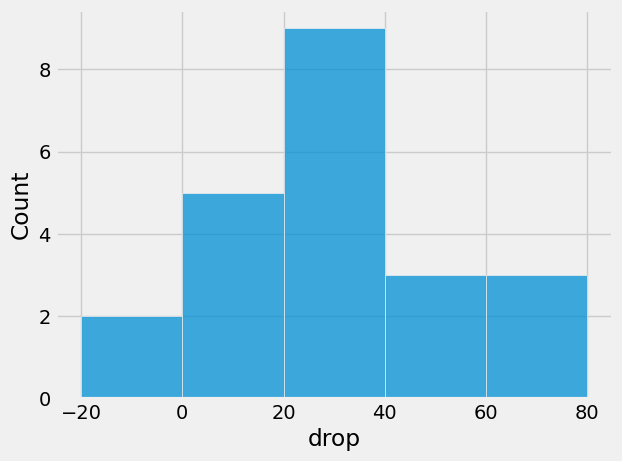

In [15]:
sns.histplot(hodgkins["drop"], bins=np.arange(-20, 81, 20))

In [16]:
np.average(hodgkins['drop'])

28.615909090909096

Na amostra, a queda média é de cerca de 28,6. Mas isso poderia ser o resultado da variação do acaso? Os dados são de uma amostra aleatória. Será que em toda a população de pacientes a queda média é de apenas 0?

Para responder a isso, podemos levantar duas hipóteses:

**Hipótese nula:** Na população, a queda média é 0.

**Hipótese alternativa:** Na população, a queda média não é 0.

Para testar essa hipótese com um corte de 1% para o valor-p, vamos construir um intervalo de confiança aproximado de 99% para a queda média na população.

In [17]:
def one_bootstrap_mean():
    resample = hodgkins.sample(frac=1, replace=True)
    return np.average(resample['drop'])

In [18]:
# Generate 10,000 bootstrap means
num_repetitions = 10000
bstrap_means = np.array([])
for i in np.arange(num_repetitions):
    bstrap_means = np.append(bstrap_means, one_bootstrap_mean())

In [19]:
# Get the endpoints of the 99% confidence interval
left = np.percentile(bstrap_means, 0.5)
right = np.percentile(bstrap_means, 99.5)

print(left, right)

17.140663636363634 40.815981818181804


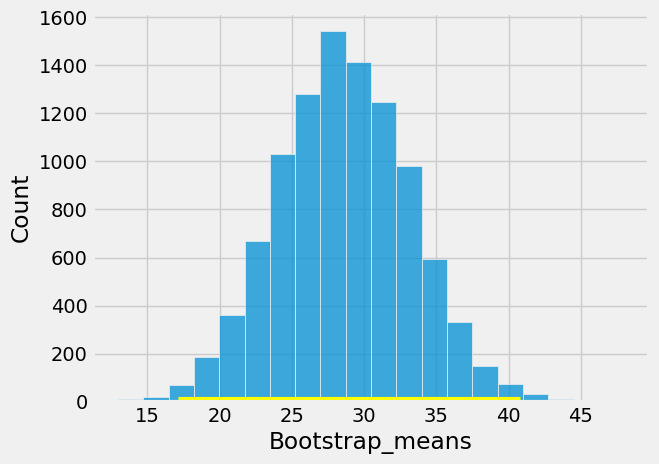

In [20]:
resampled_means = pd.DataFrame().assign(Bootstrap_means=bstrap_means)

sns.histplot(resampled_means["Bootstrap_means"], bins=20)
plt.plot([left, right], [0, 0], color='yellow', lw=8)

O intervalo de confiança de 99% para a queda média na população vai de cerca de 17 a cerca de 40. O intervalo não contém 0. Portanto, rejeitamos a hipótese nula.

Mas observe que fizemos melhor do que simplesmente concluir que a queda média na população não é 0. Estimamos o tamanho da queda média. Esse é um resultado mais útil do que apenas dizer: "Não é 0".

**Uma observação sobre a precisão:** nosso intervalo de confiança é bastante amplo por dois motivos principais:
- O nível de confiança é alto (99%).
- O tamanho da amostra é relativamente pequeno em comparação com os nossos exemplos anteriores.

## Nota final ##
A terminologia de um campo geralmente vem dos principais pesquisadores desse campo. [Brad Efron](https://en.wikipedia.org/wiki/Bradley_Efron), que primeiro propôs a técnica bootstrap, usou um termo que tem [origens americanas](https://en.wikipedia.org/wiki/Bootstrapping ). Para não ficar atrás, os estatísticos chineses [propuseram seu próprio método](http://econpapers.repec.org/article/eeestapro/v_3a37_3ay_3a1998_3ai_3a4_3ap_3a321-329.htm).